## TTT (Tic Tac Toe) Skittles

In [1]:
%pylab inline
from Game import *
from Game.minimax import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.2.15


Functions for the Game

In [2]:
def initial_state():
    state=Board(3,3)
    state.pieces=['.','X','O']
    
        
    return state

In [3]:
def update_state(state,player,move):
    new_state=state
    new_state[move]=player
    return new_state

In [4]:
def win_status(state,player):
    # this will be a bit longer
    
#     0 | 1 | 2
#     ---------
#     3 | 4 | 5
#     ---------
#     6 | 7 | 8
    

    if state[0]==player and state[4]==player and state[8]==player:
        return 'win'
    if state[2]==player and state[4]==player and state[6]==player:
        return 'win'
    if state[0]==player and state[1]==player and state[2]==player:
        return 'win'
    if state[3]==player and state[4]==player and state[5]==player:
        return 'win'
    if state[6]==player and state[7]==player and state[8]==player:
        return 'win'
    if state[0]==player and state[3]==player and state[6]==player:
        return 'win'
    if state[1]==player and state[4]==player and state[7]==player:
        return 'win'
    if state[2]==player and state[5]==player and state[8]==player:
        return 'win'
    
    if player==1:
        other_player=2
    else:
        other_player=1
    
    
    if not valid_moves(state,other_player):
        return 'stalemate'
    
    
    

In [5]:
def valid_moves(state,player):

    moves=[]  # no valid moves
    for i in range(9):
        if state[i]==0:
            moves.append(i)
    
    return moves

In [6]:
def show_state(state):
    print(state[0],'|',state[1],'|',state[2])
    print("--+---+---")
    print(state[3],'|',state[4],'|',state[5])
    print("--+---+---")
    print(state[6],'|',state[7],'|',state[8])


Move Functions for the Agents

In [7]:
def random_move(state,player):
    moves=valid_moves(state,player)
    return random.choice(moves)

In [8]:
def get_human_move(state,player):
    print("Locations:")
    print("    0 | 1 | 2")
    print("    ---------")
    print("    3 | 4 | 5")
    print("    ---------")
    print("    6 | 7 | 8")
    
    while True:
        
        move=input('What square do you want to move to?')
        move=int(move)

        if move in valid_moves(state,player):
            break
        else:
            print("You messed up!")
    
    return move



In [9]:
human_agent=Agent(get_human_move)
random_agent=Agent(random_move)

In [10]:
def minimax_move(state,player):

    values,moves=minimax_values(state,player)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [11]:
def skittles_move(state,player,info):

    S=info.S
    last_state=info.last_state
    last_action=info.last_action

    if not state in S:  # if we haven't seen this state before
        S[state]=Table()
        for action in valid_moves(state,player):
            S[state][action]=2
       
    move=weighted_choice(S[state])
    
    # if there are no weights at all for a state, then the move will be None
    
    if move is None:
        
        if last_state:
            S[last_state][last_action]-=1
            if S[last_state][last_action]<0:
                S[last_state][last_action]=0
            
        return random_move(state,player)
    
    return move

In [12]:
def skittles_after(status,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action
    
    if status=='lose':
        S[last_state][last_action]-=1
        if S[last_state][last_action]<0:
            S[last_state][last_action]=0
            

In [13]:
skittles_agent1=Agent(skittles_move)
skittles_agent1.S=LoadTable("TTT Skittles 1.json")
skittles_agent1.post=skittles_after


skittles_agent2=Agent(skittles_move)
skittles_agent2.S=LoadTable("TTT Skittles 2.json")
skittles_agent2.post=skittles_after

### Running the Game - Random vs Skittles 2

In [14]:
W=[]
L=[]
T=[]

n=[]
total_games=0
for i in range(100):
    g=Game(number_of_games=1000)
    g.display=False
    result=g.run(random_agent,skittles_agent2)

    SaveTable(skittles_agent1.S,"TTT Skittles 1.json")
    SaveTable(skittles_agent2.S,"TTT Skittles 2.json")

    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100

    total_games+=g.number_of_games
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    print('%.2f' % percent_wins," ",end="")

58.00  53.50  50.40  48.30  47.70  44.60  41.60  40.90  40.10  34.90  33.20  32.20  31.50  25.70  22.90  22.60  18.10  17.80  17.00  12.40  11.30  11.70  7.80  8.30  7.80  6.60  7.10  6.60  5.40  6.90  5.70  4.10  4.10  4.80  3.50  2.70  2.50  2.80  2.90  2.60  2.50  3.00  1.80  2.20  1.50  1.60  1.60  0.90  1.10  0.90  1.20  1.30  1.20  2.00  1.10  1.00  1.10  1.30  0.80  0.80  1.20  1.10  0.80  0.50  0.50  0.40  0.40  0.70  0.30  0.30  0.60  0.40  0.70  0.40  0.70  0.60  0.20  0.40  0.30  0.10  0.10  0.10  0.00  0.70  0.30  0.40  0.00  0.00  0.50  0.20  0.20  0.20  0.00  0.20  0.10  0.00  0.20  0.20  0.00  0.10  

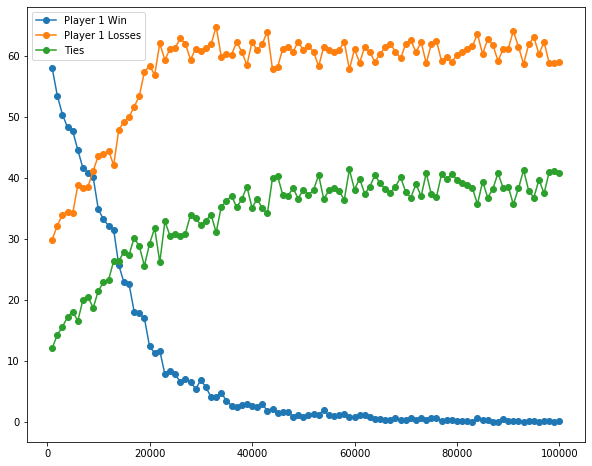

In [15]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Win')
plot(n,L,'-o',label='Player 1 Losses')
plot(n,T,'-o',label='Ties')
legend()

### Testing minimax vs trained Skittles 2 - should be all "tied"

In [16]:
g=Game(number_of_games=3)
g.display=False
result=g.run(minimax_agent,skittles_agent2)

  Choice Time: 2.6735527515411377 seconds 
  Choice Time: 0.1342909336090088 seconds 
  Choice Time: 0.008620977401733398 seconds 
  Choice Time: 0.001329183578491211 seconds 
  Choice Time: 0.00011777877807617188 seconds 
  Choice Time: 2.934825897216797 seconds 
  Choice Time: 0.14590907096862793 seconds 
  Choice Time: 0.008943796157836914 seconds 
  Choice Time: 0.0012290477752685547 seconds 
  Choice Time: 9.584426879882812e-05 seconds 
  Choice Time: 3.0409650802612305 seconds 
  Choice Time: 0.1980760097503662 seconds 
  Choice Time: 0.010239839553833008 seconds 
  Choice Time: 0.000982046127319336 seconds 
  Choice Time: 8.416175842285156e-05 seconds 


In [17]:
result

[0, 0, 0]

### Running the Game - naive Skittles 1 vs trained Skittles 2

In [18]:
W=[]
L=[]
T=[]

n=[]
total_games=0
for i in range(100):
    g=Game(number_of_games=1000)
    g.display=False
    result=g.run(skittles_agent1,skittles_agent2)

    SaveTable(skittles_agent1.S,"TTT Skittles 1.json")
    SaveTable(skittles_agent2.S,"TTT Skittles 2.json")

    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100

    total_games+=g.number_of_games
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    print('%.2f' % percent_wins," ",end="")

0.70  0.20  0.20  0.20  0.10  0.30  0.20  0.10  0.10  0.00  0.10  0.20  0.30  0.00  0.10  0.00  0.00  0.00  0.00  0.10  0.00  0.00  0.10  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  

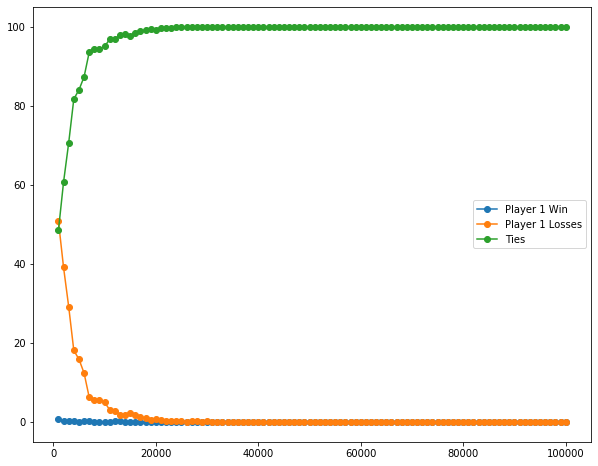

In [19]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Win')
plot(n,L,'-o',label='Player 1 Losses')
plot(n,T,'-o',label='Ties')
legend()

### Running the Game - naive Skittles 1 vs naive Skittles 2

In [20]:
skittles_agent1=Agent(skittles_move)
skittles_agent1.S=Table()            # start with a blank table
skittles_agent1.post=skittles_after


skittles_agent2=Agent(skittles_move)
skittles_agent2.S=Table()            # start with a blank table
skittles_agent2.post=skittles_after

In [21]:
W=[]
L=[]
T=[]

n=[]
total_games=0
for i in range(100):
    g=Game(number_of_games=1000)
    g.display=False
    result=g.run(skittles_agent1,skittles_agent2)

    SaveTable(skittles_agent1.S,"TTT Skittles 1.json")
    SaveTable(skittles_agent2.S,"TTT Skittles 2.json")

    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100

    total_games+=g.number_of_games
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    print('%.2f' % percent_wins," ",end="")

55.70  57.30  53.40  53.30  49.80  47.80  48.60  48.70  43.20  43.90  43.50  38.50  38.00  32.40  28.40  23.50  19.00  14.40  11.20  8.20  5.90  6.00  4.80  3.50  3.90  4.30  2.60  2.90  2.00  2.10  1.70  1.40  1.30  0.90  0.60  0.60  0.70  0.80  0.80  1.00  0.40  0.70  0.40  0.20  0.20  0.20  0.20  0.30  0.10  0.10  0.20  0.30  0.00  0.10  0.20  0.00  0.00  0.30  0.00  0.00  0.00  0.00  0.10  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.10  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  

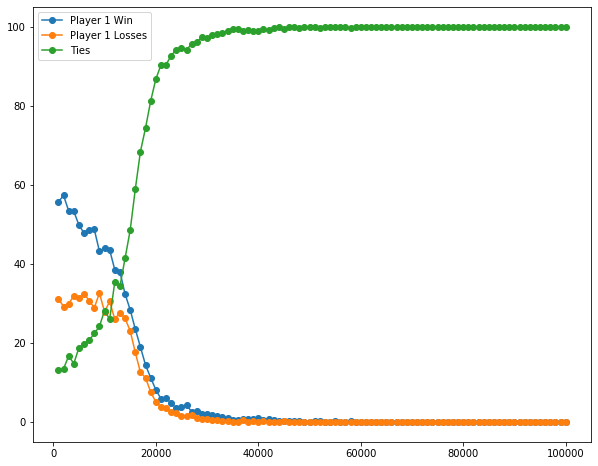

In [22]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Win')
plot(n,L,'-o',label='Player 1 Losses')
plot(n,T,'-o',label='Ties')
legend()

In [23]:
import pickle
s=pickle.dumps(skittles_agent1.S)
print(len(s))

120802
